**Machine Learning Intro | Assignment**

Question 1: Explain the differences between AI, ML, Deep Learning (DL), and Data Science (DS).

- Artificial Intelligence (AI): AI is the broad field of creating machines or systems that can perform tasks that typically require human intelligence, such as decision-making, problem-solving, understanding natural language, and recognizing patterns. It encompasses many subfields, including machine learning and robotics.

- Machine Learning (ML): ML is a subset of AI that focuses on enabling computers to learn from data and improve from experience without being explicitly programmed. It uses algorithms to identify patterns in data and make predictions or decisions. Examples include supervised learning, unsupervised learning, and reinforcement learning.

- Deep Learning (DL): DL is a further subset of ML that uses neural networks with many layers (hence "deep"). It excels at learning from large amounts of unstructured data like images, audio, and text. Deep learning models are capable of feature extraction automatically and have achieved state-of-the-art results in tasks like image recognition, natural language processing, etc.

- Data Science (DS): Data Science is a multidisciplinary field that uses scientific methods, algorithms, and systems to extract knowledge and insights from structured and unstructured data. It involves data cleaning, analysis, visualization, and interpretation. It’s broader than AI and ML because it includes understanding and preparing data for analysis, not just creating models.

Question 2: What are the types of machine learning? Describe each with one real-world example.

 - There are three main types of machine learning:

- Supervised Learning:

- In supervised learning, the model is trained on labeled data, where both the input features and the corresponding output labels are provided.

- Example: Predicting house prices based on features like square footage, number of bedrooms, etc. The labels (house prices) are known in advance.

- Unsupervised Learning:

- In unsupervised learning, the model is trained on data without labeled output. The goal is to find hidden patterns or structure in the data.

- Example: Customer segmentation for targeted marketing, where customers are grouped into different clusters based on purchasing behavior without predefined categories.

- Reinforcement Learning:

- In reinforcement learning, an agent interacts with an environment and learns by receiving feedback in the form of rewards or penalties.

- Example: Training an AI to play a video game like chess or Go, where the AI learns optimal moves by exploring the game’s possible actions and outcomes.

Question 3: Define overfitting, underfitting, and the bias-variance tradeoff in machine learning.

- Overfitting: Overfitting occurs when a model learns not only the underlying patterns but also the noise or random fluctuations in the training data. This results in poor generalization to new, unseen data. It typically happens when the model is too complex for the dataset.
Example: A decision tree that fits every data point perfectly but performs poorly on test data.

- Underfitting: Underfitting occurs when the model is too simple to capture the underlying patterns in the data. It leads to poor performance on both the training and testing sets.
Example: A linear regression model trying to fit a non-linear dataset.

- Bias-Variance Tradeoff: The bias-variance tradeoff describes the relationship between model complexity and generalization error.

- Bias refers to the error introduced by simplifying assumptions in the model (e.g., linear assumptions for a non-linear problem).

- Variance refers to the error introduced by the model's sensitivity to small fluctuations in the training data.

- The tradeoff is that as you reduce bias (by increasing model complexity), variance increases, and vice versa. The goal is to find the right balance for optimal performance.

Question 4: What are outliers in a dataset, and list three common techniques for handling them.

- Outliers: Outliers are data points that are significantly different from the rest of the data. They can distort statistical analyses and affect model performance. Outliers can be due to errors, variability in data, or rare events.

- Techniques for Handling Outliers:

- Remove Outliers: Simply remove the outlier data points from the dataset if they are determined to be errors or irrelevant.

- Imputation: Replace the outlier values with a more reasonable estimate (e.g., mean, median, or mode) based on the rest of the data.

- Transformation: Apply mathematical transformations (e.g., logarithmic or square root) to reduce the impact of outliers by compressing the scale of large values.

In [7]:
#Question 6: Write a Python program that creates a synthetic imbalanced dataset with make_classification() from sklearn.datasets. Prints the class distribution.
from sklearn.datasets import make_classification
from collections import Counter

# Create synthetic imbalanced dataset
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],
    random_state=42
)

# Convert labels to Python ints and print class distribution
class_distribution = Counter(int(label) for label in y)
print("Class distribution:", class_distribution)




Class distribution: Counter({0: 895, 1: 105})


In [2]:
#Question 7: Implement one-hot encoding using pandas for the following list of colors: ['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.
import pandas as pd

# List of colors
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']

# Create a pandas DataFrame
df = pd.DataFrame(colors, columns=['Color'])

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df['Color'])

# Print the resulting dataframe
print(one_hot_encoded)


    Blue  Green    Red
0  False  False   True
1  False   True  False
2   True  False  False
3  False   True  False
4  False  False   True


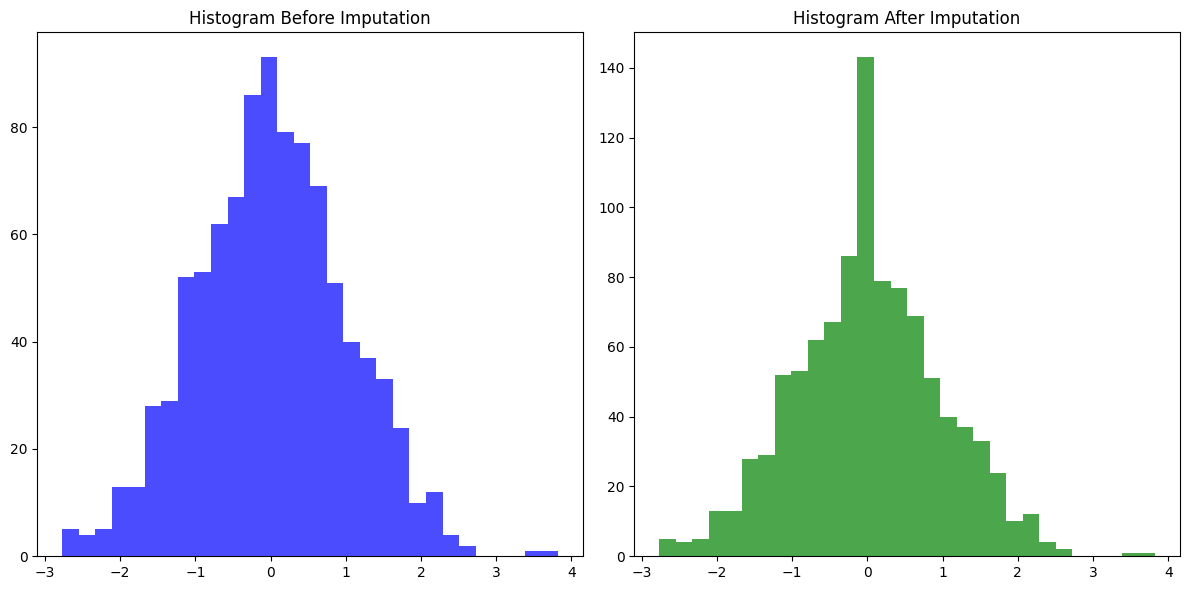

In [3]:
#Question 8: Write a Python script to generate 1000 samples from a normal distribution, introduce 50 random missing values, fill missing values with the column mean, and plot a histogram before and after imputation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate 1000 samples from a normal distribution
data = np.random.normal(loc=0, scale=1, size=1000)

# Introduce 50 random missing values
missing_indices = np.random.choice(1000, 50, replace=False)
data[missing_indices] = np.nan

# Plot histogram before imputation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title('Histogram Before Imputation')

# Fill missing values with the column mean
mean_value = np.nanmean(data)
data_imputed = np.where(np.isnan(data), mean_value, data)

# Plot histogram after imputation
plt.subplot(1, 2, 2)
plt.hist(data_imputed, bins=30, color='green', alpha=0.7)
plt.title('Histogram After Imputation')

plt.tight_layout()
plt.show()


In [4]:
#Question 9: Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15, 20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# List of numbers
data = np.array([2, 5, 10, 15, 20]).reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the data
scaled_data = scaler.fit_transform(data)

# Print the scaled array
print(scaled_data)


[[0.        ]
 [0.16666667]
 [0.44444444]
 [0.72222222]
 [1.        ]]


In [11]:
# #Question 10: You are working as a data scientist for a retail company. You receive a customer
# transaction dataset that contains:
# ● Missing ages,
# ● Outliers in transaction amount,
# ● A highly imbalanced target (fraud vs. non-fraud),
# ● Categorical variables like payment method.
# Explain the step-by-step data preparation plan you’d follow before training a machine learning
# model. Include how you’d address missing data, outliers, imbalance, and encoding.
# (Include your Python code and output in the code box below.)
# Answer:What does this below code wiull do :
# Inspect & Understand Data – Check for missing values, outliers, class imbalance, and categorical features.

# Handle Missing Ages – Use median imputation (robust to skew).

# Detect & Cap Outliers – Use the IQR method to cap extreme transaction amounts.

# Encode Categorical Variables – Apply One-Hot Encoding to payment_method.

# Scale Features – Use RobustScaler for numeric features.

# Address Imbalanced Target – Use SMOTE to balance fraud vs. non-fraud classes.

# Split Data – Stratified train/test split to preserve class distribution.
# === DATA PREPARATION PIPELINE ===
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# -------------------- 1. Create synthetic dataset --------------------
np.random.seed(42)
n = 1000
# Transaction amounts with outliers
transaction_amount = np.random.exponential(scale=50, size=n) + 5
outlier_idx = np.random.choice(n, size=10, replace=False)
transaction_amount[outlier_idx] *= 200  # add extreme outliers

# Ages with missing values
age = np.random.randint(18, 70, size=n).astype(float)
age[np.random.choice(n, size=150, replace=False)] = np.nan  # 15% missing

# Payment method and target
payment_method = np.random.choice(['card', 'mobile', 'cash', 'upi'], size=n, p=[0.5,0.2,0.2,0.1])
is_fraud = np.random.choice([0,1], size=n, p=[0.95,0.05])  # Imbalanced

df = pd.DataFrame({
    'age': age,
    'transaction_amount': transaction_amount,
    'payment_method': payment_method,
    'is_fraud': is_fraud
})

print("Initial fraud distribution:", Counter(df['is_fraud']))
print("Missing ages:", df['age'].isna().sum())

# -------------------- 2. Cap outliers --------------------
Q1, Q3 = df['transaction_amount'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
df['transaction_amount_capped'] = df['transaction_amount'].clip(lower, upper)

# -------------------- 3. Train/Test Split --------------------
X = df[['age','transaction_amount_capped','payment_method']]
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# -------------------- 4. Preprocessing Pipelines --------------------
numeric_features = ['age','transaction_amount_capped']
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_features = ['payment_method']
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Fit and transform
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

print("Processed feature shape:", X_train_prep.shape)

# -------------------- 5. Handle Class Imbalance with SMOTE --------------------
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_prep, y_train)

print("Before resampling:", Counter(y_train))
print("After resampling:", Counter(y_resampled))

# -------------------- 6. Show Processed Sample --------------------
cat_cols = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
columns = numeric_features + list(cat_cols)
print("\nSample of processed & balanced data:")
print(pd.DataFrame(X_resampled, columns=columns).head())

Initial fraud distribution: Counter({0: 958, 1: 42})
Missing ages: 150
Processed feature shape: (800, 6)
Before resampling: Counter({0: 766, 1: 34})
After resampling: Counter({0: 766, 1: 766})

Sample of processed & balanced data:
        age  transaction_amount_capped  payment_method_card  \
0  0.000000                   1.124566                  1.0   
1  1.095238                   1.276541                  1.0   
2  0.095238                   2.146198                  1.0   
3  0.904762                   0.700915                  1.0   
4  0.857143                  -0.539648                  0.0   

   payment_method_cash  payment_method_mobile  payment_method_upi  
0                  0.0                    0.0                 0.0  
1                  0.0                    0.0                 0.0  
2                  0.0                    0.0                 0.0  
3                  0.0                    0.0                 0.0  
4                  0.0                    1.0     